<a href="https://colab.research.google.com/github/aman-theanalyst/Telecom-Customer-Churn-Analysis/blob/main/Telecom_Customer_Churn_dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telecom - Customer Churn Data Analysis**

Customer churn means the customer has stopped using the company’s product or service.

In [4]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading csv file

df = pd.read_csv('/content/drive/MyDrive/EDA Projects/Project-2/Customer Churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Summary of your DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here, Total charges column have data type object bcz of the blank spaces of customer who have just started services i.e. tenure = 0.    
So, we will replace blank spaces with 0.

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [10]:
# Checking for missing values + Understanding data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# to check null for each column

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
# statistical summaries of your dataset’s numeric columns

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# checks for duplicate rows in a DataFrame

df.duplicated().sum()


np.int64(0)

In [14]:
# check duplicated based on primary key(unique column)

df["customerID"].duplicated().sum()

np.int64(0)

Senior citizen column contain 0 and 1. We will change it to yes or no using function for convinience

In [15]:
# Changing Seniorcitizen column values to "yes"/"no"

def convert(value):
  if value == 1:
    return "yes"
  else:
    return "no"

# applying this ft to seniorcitizen column

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


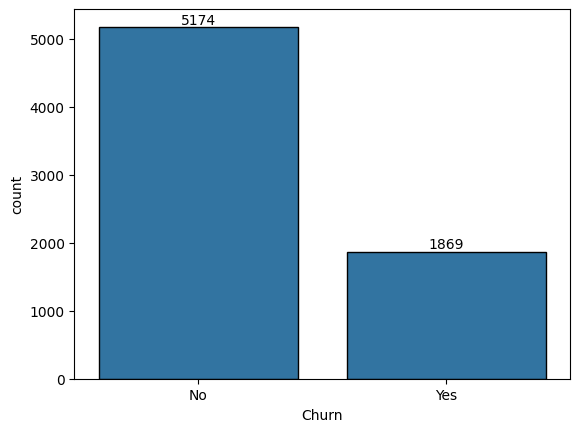

In [27]:
# Count plot for the churn column that shows both bars and count labels.

ax = sns.countplot(x = df["Churn"], data = df, edgecolor="black")

ax.bar_label(ax.containers[0])
plt.show()

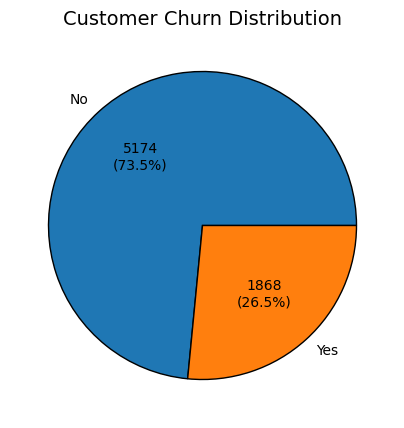

In [18]:
# In percentage

# Count churn values
churn_counts = df['Churn'].value_counts()


plt.figure(figsize=(5,5))
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct=lambda p: f'{int(p * sum(churn_counts)/100)}\n({p:.1f}%)',
        wedgeprops={'edgecolor': 'black'})

plt.title("Customer Churn Distribution", fontsize=14)
plt.show()

**1st Conclusion :**    
From the above 2 charts, we can conclude that 26.5 % of the customer have churned out (i.e. 1868 out of 7043).

Lets explore the reason behind this:

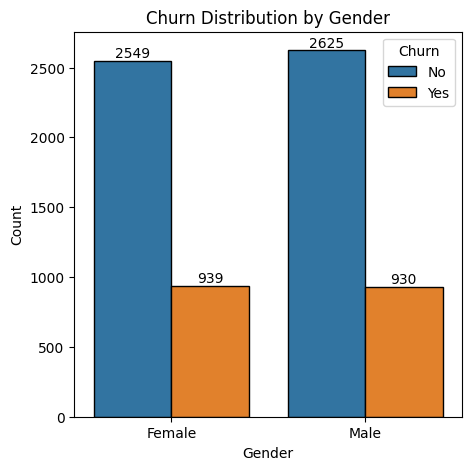

In [25]:
# Churn Distribution by Gender

plt.figure(figsize=(5,5))
ax = sns.countplot(x='gender', hue='Churn', data=df, edgecolor="black")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


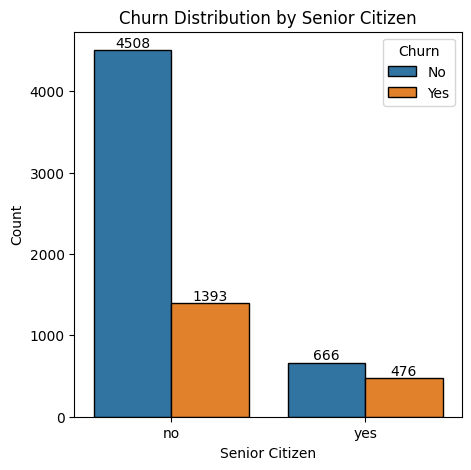

In [26]:
# Churn Distribution by Senior Citizen

plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["SeniorCitizen"], data = df, hue ='Churn', edgecolor="black")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Distribution by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

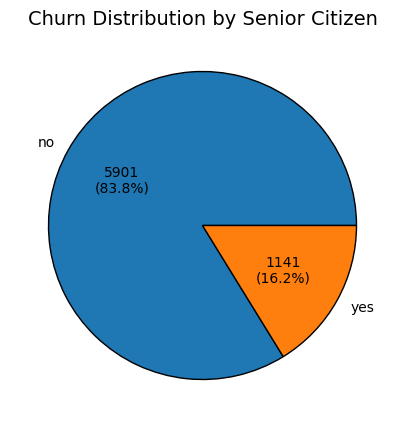

In [21]:
# In percentage

# Count churn values
churn_counts = df['SeniorCitizen'].value_counts()


plt.figure(figsize=(5,5))
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct=lambda p: f'{int(p * sum(churn_counts)/100)}\n({p:.1f}%)',
        wedgeprops={'edgecolor': 'black'})

plt.title("Churn Distribution by Senior Citizen", fontsize=14)
plt.show()

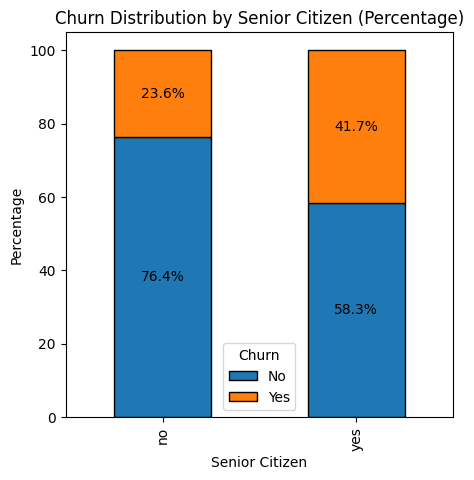

In [22]:
# Stacked bar chart with percentages

# Create a cross-tab (frequency table)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(5,5), edgecolor='black')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

plt.title("Churn Distribution by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title='Churn')
plt.show()

Conclusion 2:


**Conclusion 2:**

From the stacked bar chart, we can conclude that senior citizens have a significantly higher churn rate (41.7%) compared to non-senior citizens (23.6%). This suggests that senior citizens might be facing specific issues or not finding the services suitable for their needs, leading to a higher likelihood of churning. The count plots also support this, showing a higher proportion of churn among senior citizens.

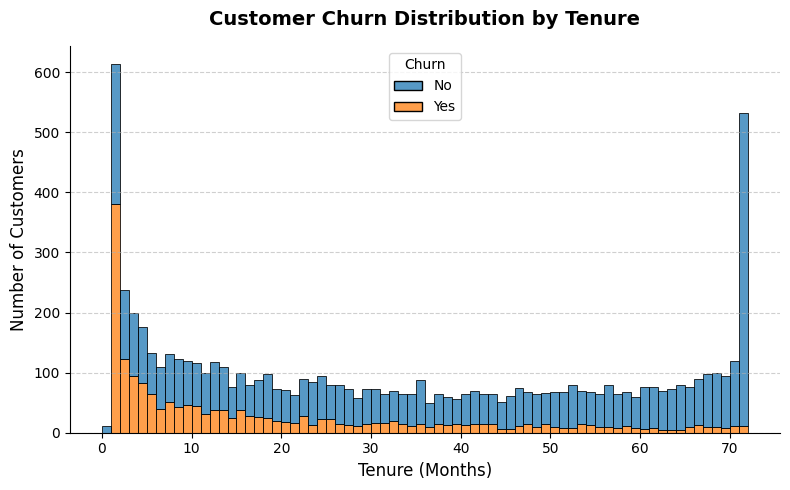

In [23]:


# sns.histplot(data=df, x="tenure", bins = 72, hue="Churn")
# plt.title("Churn Distribution by Tenure")
# plt.xlabel("Tenure")
# plt.show()

plt.figure(figsize=(8,5))
ax = sns.histplot(
    data=df,
    x="tenure",
    bins=72,
    hue="Churn",
    multiple="stack",     # stack churn groups instead of overlapping
    edgecolor="black",    # black borders for clarity
)

plt.title("Customer Churn Distribution by Tenure", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()  # remove top & right spines for cleaner look

plt.tight_layout()
plt.show()

**Conclusion 3: Churn Distribution by Tenure**

The histogram showing churn distribution by tenure reveals several important patterns:

* **High churn in the first few months:** A significant number of customers churn within the first few months of their service. This is indicated by the tall bars for low tenure values in the 'Yes' churn category.
* **Lower churn for long-term customers:** As tenure increases, the number of churning customers generally decreases. Customers who stay with the service for longer periods are less likely to churn.
* **Peaks at certain tenure values:** There appear to be some peaks in churn at specific tenure lengths. This could suggest that certain contract lengths or service milestones might be associated with higher churn rates.
* **Overall distribution:** The distribution of churned customers is skewed towards lower tenure, while non-churned customers are more spread out across different tenure lengths, with a larger proportion having longer tenures.

This analysis suggests that focusing on customer onboarding and early engagement could be crucial in reducing churn. Additionally, understanding the reasons behind churn at specific tenure peaks could provide valuable insights for targeted retention strategies.

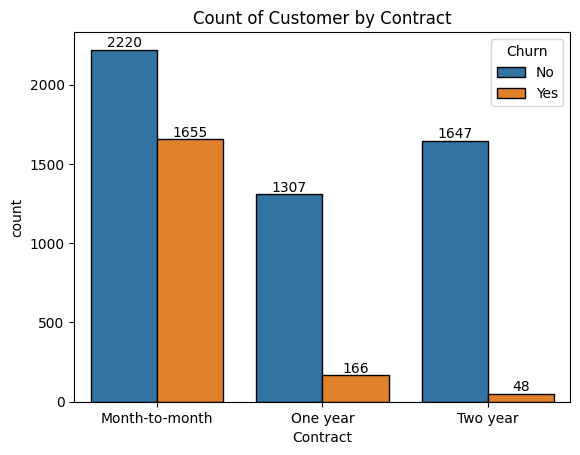

In [29]:
ax = sns.countplot(x = df["Contract"], data = df, hue="Churn", edgecolor="black")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer by Contract")
plt.show()

**Conclusion 4: Churn Distribution by Contract Type**

The count plot illustrating churn distribution by contract type reveals a strong relationship between contract duration and customer churn:

* **Month-to-month contracts have the highest churn:** A significantly higher number of customers on month-to-month contracts churn compared to those on one-year or two-year contracts. This is clearly visible from the tall bars for the 'Yes' churn category within the 'Month-to-month' contract type.
* **Two-year contracts have the lowest churn:** Customers with two-year contracts show the lowest churn rate. This is likely due to the longer commitment period, indicating higher customer loyalty and satisfaction.
* **One-year contracts have moderate churn:** The churn rate for one-year contracts is lower than month-to-month but higher than two-year contracts.

This analysis highlights that customers with shorter contract terms, particularly month-to-month, are more likely to churn. This suggests that offering incentives for longer contract commitments or implementing strategies to improve satisfaction and retention for month-to-month customers could be effective in reducing overall churn.

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

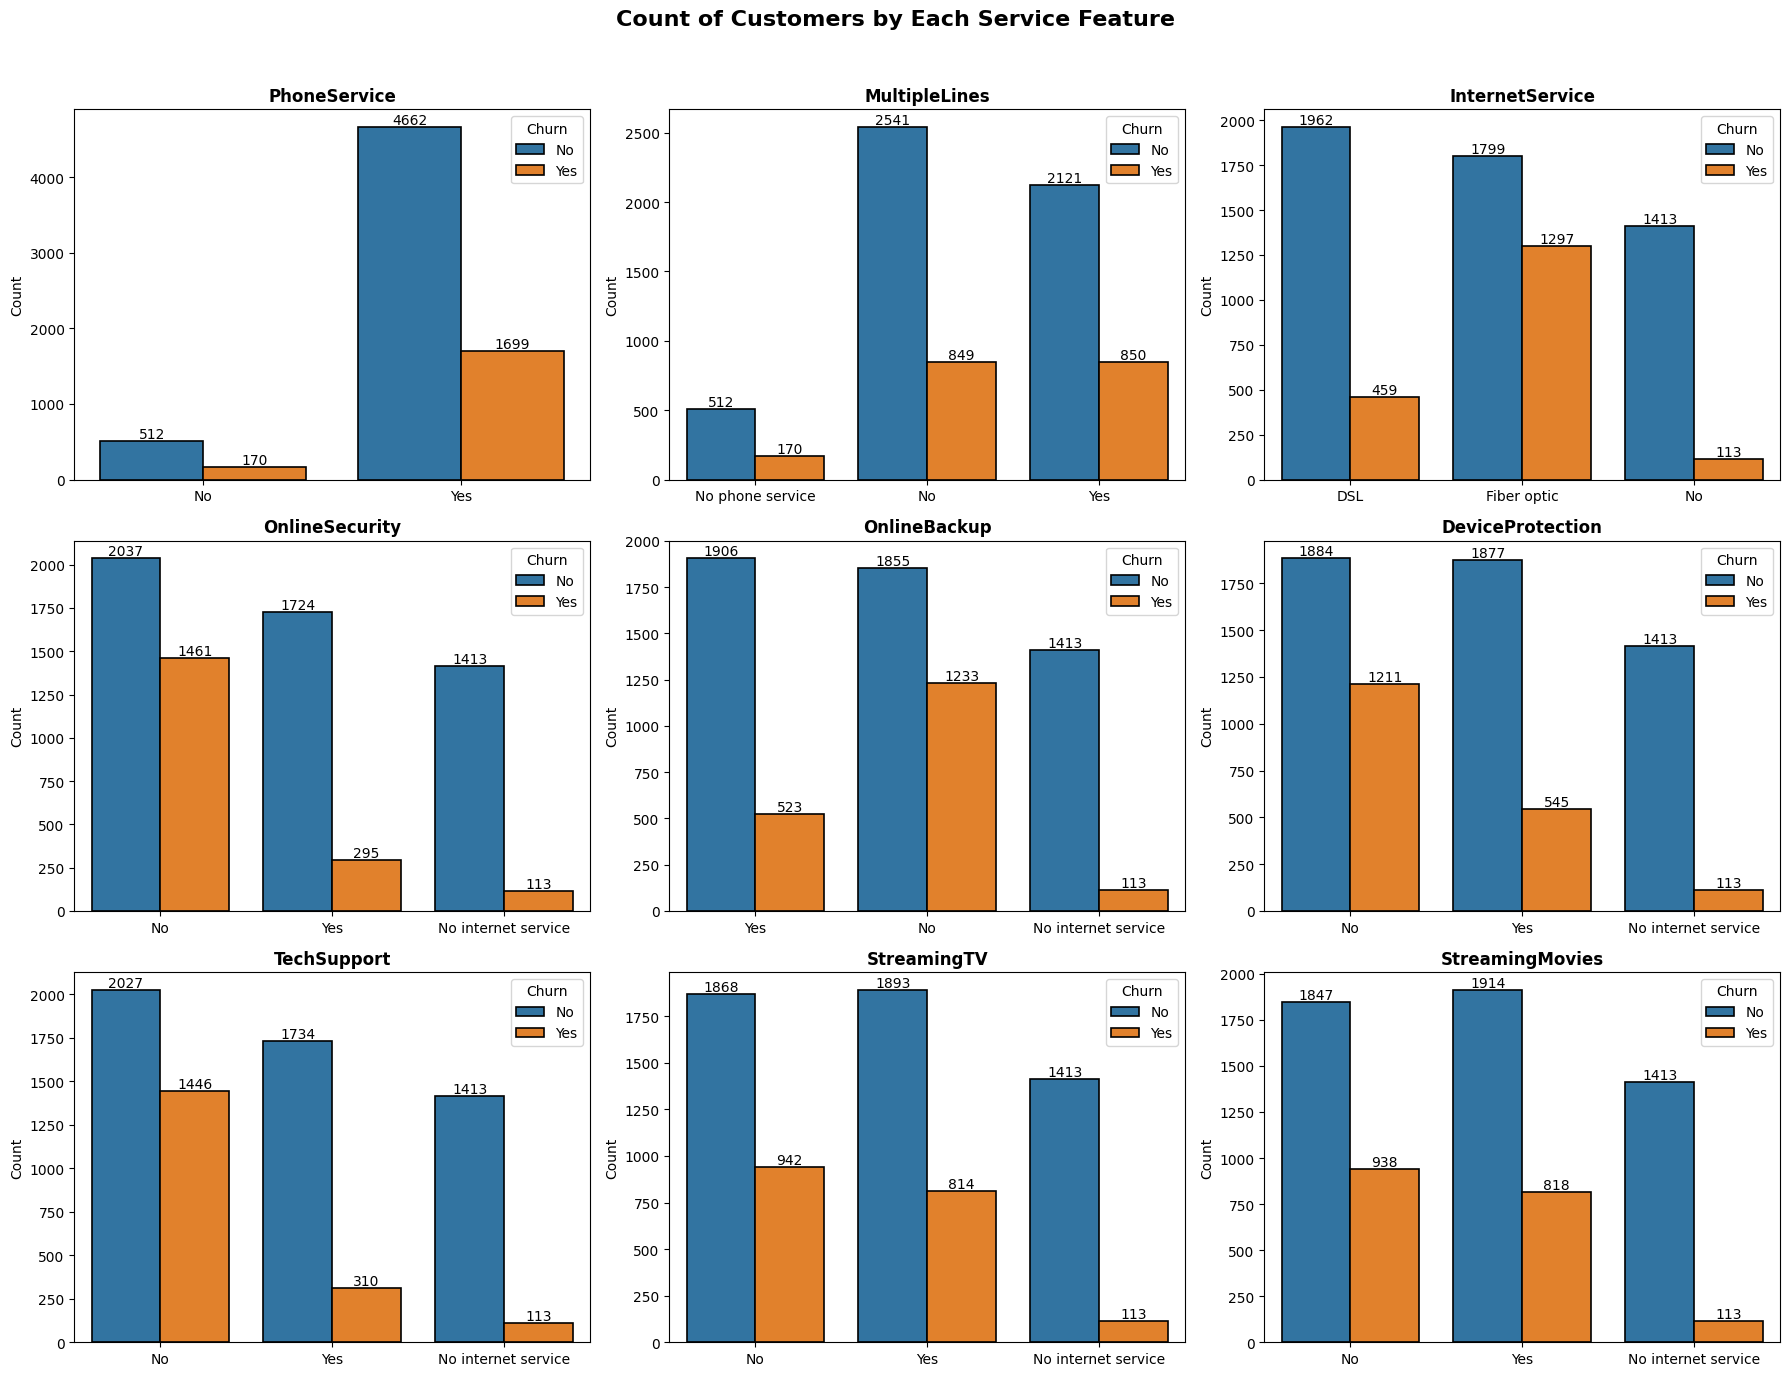

In [39]:
# Subplot

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("Count of Customers by Each Service Feature", fontsize=16, fontweight="bold")

# Flatten axes for iteration
axes = axes.flatten()

# Loop through each column and plot countplot
for i, col in enumerate(cols):
    ax = sns.countplot(x=col, data=df, ax=axes[i],
                       edgecolor="black", linewidth=1.2, hue="Churn")
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title(col, fontsize=12, fontweight="bold")
    ax.set_xlabel("")  # optional: hides x-axis label for cleaner look
    ax.set_ylabel("Count")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Conclusion 5: Churn Distribution by Service Features**

The subplots visualizing churn distribution across various service features reveal insights into which services might be influencing customer churn:

* **Phone Service:** There isn't a significant difference in churn rates between customers with and without phone service. This suggests that having phone service itself is not a primary driver of churn.

* **Multiple Lines:** Customers with multiple lines appear to have a slightly higher churn rate compared to those with no multiple lines, but the difference is not substantial.

* **Internet Service:** This feature shows a notable difference. Customers with Fiber Optic internet service have a considerably higher churn rate than those with DSL or no internet service. This could indicate issues with the quality, reliability, or cost of the fiber optic service.

* **Online Security:** Customers who do not have online security services have a higher churn rate than those who do. This suggests that online security is a valuable add-on that contributes to customer retention.

* **Online Backup:** Similar to online security, customers without online backup services are more likely to churn. This reinforces the idea that additional security and backup features are important for customer satisfaction and retention.

* **Device Protection:** Customers without device protection show a higher churn rate compared to those with the service. This indicates that offering device protection can help reduce churn.

* **Tech Support:** Customers who do not have tech support have a significantly higher churn rate than those who do. This is a strong indicator that reliable tech support is crucial for retaining customers.

* **Streaming TV:** Customers with streaming TV services have a slightly higher churn rate than those without, but the difference is not as pronounced as with other features.

* **Streaming Movies:** Similar to streaming TV, customers with streaming movies services have a slightly higher churn rate than those without.

Overall, the analysis of service features suggests that **Internet Service (Fiber Optic), Online Security, Online Backup, Device Protection, and Tech Support** have the most significant impact on customer churn. Customers lacking security and support-related services, as well as those with Fiber Optic internet, are more likely to churn. Focusing on improving these areas could be key to reducing churn.

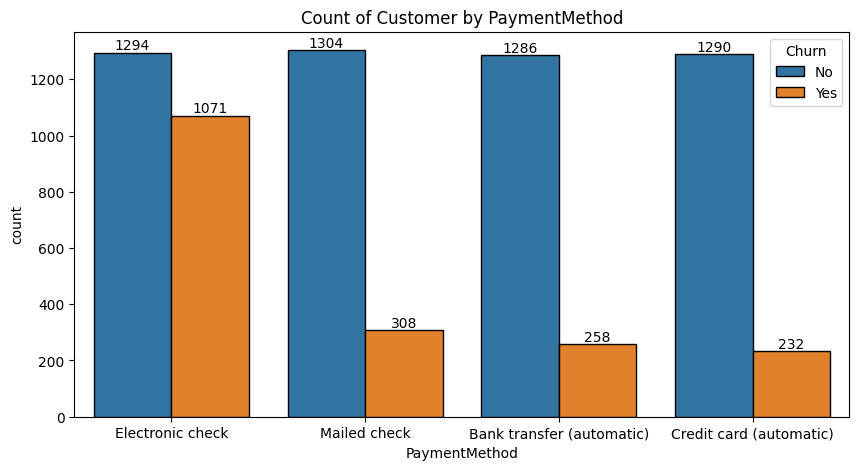

In [43]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = df["PaymentMethod"], data = df, hue="Churn", edgecolor="black")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer by PaymentMethod")
plt.show()

**Conclusion 6: Churn Distribution by Payment Method**

The count plot showing churn distribution by payment method reveals differences in churn rates across different payment options:

* **Electronic check has the highest churn:** Customers who use electronic checks as their payment method have a significantly higher churn rate compared to those using other methods. This suggests there might be issues or friction associated with the electronic check payment process, leading to more churn.
* **Bank transfer (automatic) and Credit card (automatic) have lower churn:** Customers using automatic payment methods like bank transfer and credit card have considerably lower churn rates. This is expected, as automatic payments often indicate a higher level of commitment and convenience for the customer.
* **Mailed check has moderate churn:** The churn rate for mailed checks is lower than electronic checks but higher than the automatic payment methods.

This analysis indicates that the payment method plays a role in customer churn, with electronic check users being the most likely to churn. Investigating potential issues with the electronic check process and encouraging customers to switch to automatic payment methods could help reduce churn.